# 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

# 讀入資料

In [168]:
data=pd.read_csv("Titanic_train.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


# 觀察 Age

## step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


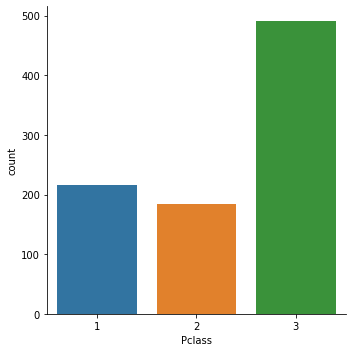

In [182]:
g = sns.catplot("Pclass",data=data,kind="count");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


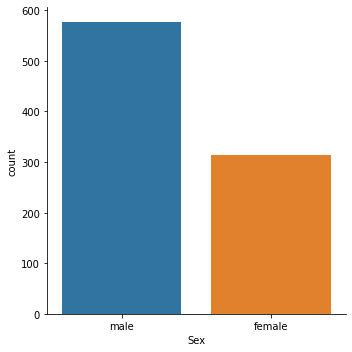

In [183]:
#男生女生個數
g = sns.catplot("Sex",data=data,kind="count");

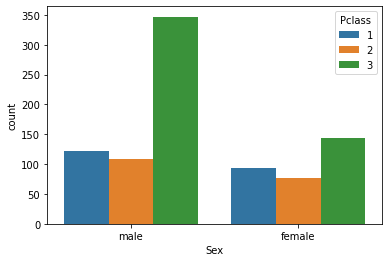

In [184]:
g = sns.countplot(x="Sex", hue="Pclass", data=data) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


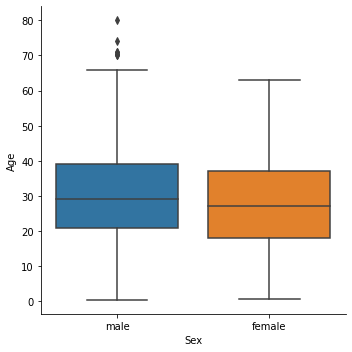

In [178]:
#男生女生中年齡分布
g = sns.catplot("Sex",'Age',data=data,kind="box")
#發現男生女生都有小孩族群，其中年齡分佈無較大差別

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


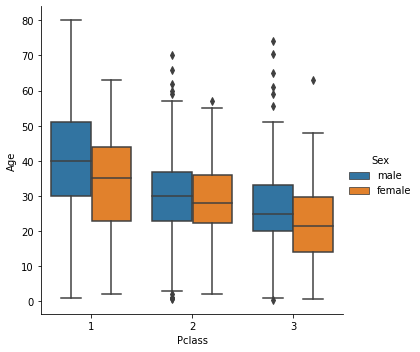

In [177]:
#艙等的年齡分布
g = sns.catplot("Pclass",'Age',hue='Sex',data=data,kind="box" )
#艙等一相對年齡普遍較高,艙等三相對年齡普遍較低

In [32]:
# 細看遺失資料的樣態
missing_index=data.isnull()
display(data[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [65]:
data2=data[['Age','Pclass','Sex']] #複製一份資料給 data2
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing

#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data2['Sex']=le.fit_transform(data['Sex'])
display(data2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


In [66]:
data2.corr()

,Age,Pclass,Sex
Age,1.000000,-0.369226,0.093254
Pclass,-0.369226,1.000000,0.131900
Sex,0.093254,0.131900,1.000000


In [142]:
#計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data2)))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html?highlight=nan_euclidean


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,18.027756,36.069378,2.000000,17.000000,8.062258,33.030289,20.000000,1.224745,9.055385,1.224745,13.038405,12.041595,7.071068,6.324555,14.035669,16.031220,0.000000,3.605551,1.224745,0.000000,18.110770,2.738613,1.224745,44.011362,6.324555,20.099751,0.000000,1.000000,4.123106,8.062258,...,52.000000,13.038405,6.403124,22.045408,4.123106,23.108440,29.068884,2.236068,0.000000,19.000000,1.414214,26.095977,1.224745,2.236068,20.049938,5.196152,9.219544,0.000000,18.000000,4.000000,25.099801,11.180340,25.000000,6.164414,7.071068,2.000000,3.000000,0.000000,34.073450,3.316625,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,34.058773,20.000000,18.138357,2.449490,24.083189,17.029386,36.069378,1.732051,7.280110,2.449490,3.316625,4.242641,23.086793,10.049876,30.066593,2.000000,2.738613,19.026298,2.449490,2.738613,2.236068,0.000000,2.449490,28.035692,10.049876,4.123106,2.738613,17.146428,20.099751,24.083189,...,36.069378,29.068884,22.000000,6.082763,20.099751,7.000000,13.038405,14.142136,2.738613,3.741657,17.058722,10.000000,2.449490,14.071247,4.123106,11.045361,7.071068,2.738613,34.073450,12.206556,9.000000,5.099020,9.273618,10.049876,23.086793,18.138357,19.131126,2.738613,18.000000,13.038405,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,22.000000,32.062439,6.082763,13.038405,12.000000,29.017236,24.020824,1.732051,5.000000,0.000000,9.110434,8.124038,11.000000,3.000000,18.000000,12.000000,1.224745,7.348469,0.000000,1.224745,14.177447,2.449490,0.000000,40.024992,3.000000,16.155494,1.224745,5.099020,8.000000,12.000000,...,48.010416,17.000000,10.198039,18.027756,8.000000,19.104973,25.099801,2.000000,1.224745,15.033296,5.196152,22.090722,0.000000,2.449490,16.031220,1.414214,5.477226,1.224745,22.022716,1.000000,21.095023,7.348469,21.023796,2.236068,11.000000,6.082763,7.071068,1.224745,30.066593,1.414214,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,31.064449,23.000000,15.165751,4.582576,21.095023,20.024984,33.075671,1.732051,4.472136,2.449490,1.414214,1.732051,20.099751,7.071068,27.073973,3.605551,2.738613,16.031220,2.449490,2.738613,5.099020,0.000000,2.449490,31.032241,7.071068,7.071068,2.738613,14.177447,17.117243,21.095023,...,39.064050,26.076810,19.000000,9.055385,17.117243,10.000000,16.031220,11.180340,2.738613,6.403124,14.071247,13.000000,2.449490,11.090537,7.071068,8.062258,4.123106,2.738613,31.080541,9.273618,12.000000,2.236068,12.206556,7.071068,20.099751,15.165751,16.155494,2.738613,21.000000,10.049876,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,31.016125,23.108440,15.000000,4.000000,21.023796,20.049938,33.000000,1.224745,4.123106,1.224745,1.000000,1.414214,20.024984,7.280110,27.018512,3.162278,0.000000,16.124515,1.224745,0.000000,5.385165,2.738613,1.224745,31.016125,7.280110,7.280110,0.000000,14.000000,17.029386,21.023796,...,39.000000,26.019224,19.131126,9.110434,17.029386,10.246951,16.124515,11.045361,0.000000,6.000000,14.035669,13.190906,1.224745,11.045361,7.141428,8.124038,4.472136,0.000000,31.000000,9.000000,12.206556,2.828427,12.000000,7.141428,20.024984,15.000000,16.000000,0.000000,21.118712,10.099505,2.

In [98]:
data2[data2['Age'].isnull()]

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0
...,...,...,...
859,NaN,3,1
863,NaN,3,0
868,NaN,3,1
878,NaN,3,1


### 方法 1 : 用平均數補值補年齡

In [139]:
data_age=data2.copy()

data_age['Age']=data2['Age'].fillna(data2['Age'].mean())
display(data_age)
# 觀察到用平均數補值，效果沒有那麼好。

,Age,Pclass,Sex
0,22.000000,3,1
1,38.000000,1,0
2,26.000000,3,0
3,35.000000,1,0
4,35.000000,3,1
...,...,...,...
886,27.000000,2,1
887,19.000000,1,0
888,29.699118,3,0
889,26.000000,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


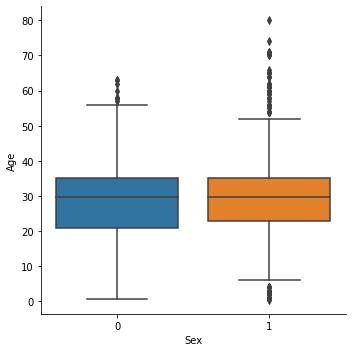

In [179]:
#Age空值使用平均值填補完，男生女生年齡分布，沒有較大區別
g = sns.catplot("Sex",'Age',data=data_age,kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


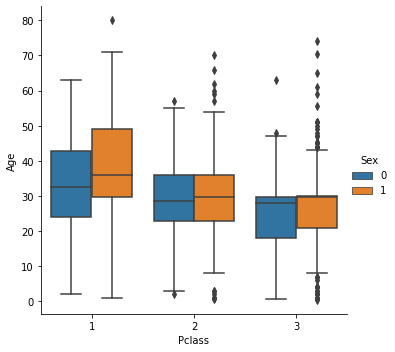

In [181]:
#Age空值填補完，因艙等3的Age空值較多，其艙等的年齡分布iqr3-iqr1區間值有縮小,與原先不同
g = sns.catplot("Pclass",'Age',hue='Sex',data=data_age,kind="box")

###方法2-1    K=1,weights= distance
*由於 k=1 ，看不出 weights 的效果

In [145]:
data_k1=data2.copy() #複製一份資料給 data
# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled_k1 = pd.DataFrame(imputer.fit_transform(data_k1))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled_k1)

,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,26.0,3.0,0.0
889,26.0,1.0,1.0


In [156]:
data2.iloc[0:30]

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
5,NaN,3,1
6,54.0,1,1
7,2.0,3,1
8,27.0,3,0
9,14.0,2,0


In [157]:
df_filled_k1.iloc[[5,17,19,26,28,29]]

,0,1,2
5,22.0,3.0,1.0
17,35.0,2.0,1.0
19,26.0,3.0,0.0
26,22.0,3.0,1.0
28,26.0,3.0,0.0
29,22.0,3.0,1.0


### 方法2-2  K=3,weights= distance

In [159]:
data_k3=data2.copy() #複製一份資料給 data

# KNN
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled_k3 = pd.DataFrame(imputer.fit_transform(data_k3))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled_k3)

,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,19.0,3.0,0.0
889,26.0,1.0,1.0


In [160]:
df_filled_k3.iloc[[5,17,19,26,28,29]]

,0,1,2
5,19.666667,3.0,1.0
17,45.000000,2.0,1.0
19,19.000000,3.0,0.0
26,19.666667,3.0,1.0
28,19.000000,3.0,0.0
29,19.666667,3.0,1.0


### 方法2-3 k=2,add indicator = 'true' 的差異

In [161]:
dat_k2=data2.copy() #複製一份資料給 data

# KNN
value_neighbors=2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled_k2 = pd.DataFrame(imputer.fit_transform(data2))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled_k2)


##結果多了一行"3",代表有補值

,0,1,2,3
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
886,27.0,2.0,1.0,0.0
887,19.0,1.0,0.0,0.0
888,26.5,3.0,0.0,1.0
889,26.0,1.0,1.0,0.0


### 方法2-4 sex 類別- 類別資料轉換對於 KNN 的影響

In [175]:
data_sex=data[['Age','Pclass','Sex']] #複製一份資料給 data

data_sex['Sex'].replace({'male':0,'female': 1000},inplace=True)
print(data_sex['Sex'])

# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled_sex = pd.DataFrame(imputer.fit_transform(data_sex))
display(df_filled_sex)


0         0
1      1000
2      1000
3      1000
4         0
       ... 
886       0
887    1000
888    1000
889       0
890       0
Name: Sex, Length: 891, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,0,1,2
0,22.0,3.0,0.0
1,38.0,1.0,1000.0
2,26.0,3.0,1000.0
3,35.0,1.0,1000.0
4,35.0,3.0,0.0
...,...,...,...
886,27.0,2.0,0.0
887,19.0,1.0,1000.0
888,26.0,3.0,1000.0
889,26.0,1.0,0.0


#判斷補值的好壞?
可以運用模型預測準確度的指標，來判斷補值的好壞

MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷， MSE 越小代表補值的準確度越高。 還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。

Step1:取無遺失值的資料集

Step2:隨機取幾個資料點，當作遺失值

Step3:以step2產生的遺失值進行補值，

Step4: 計算MSE看補值的效果。


In [296]:
#* Step1:取無遺失值的資料集

import random
completet_data=data2.dropna()
#重製index
completet_data=completet_data.reset_index(drop=True)
display(completet_data)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


In [298]:
#* Step2:隨機取 10 個資料點，當作遺失值
a = random.sample(list(completet_data.index),10) 
missing_data=completet_data.copy()
missing_data['Age'].iloc[a]=np.nan
display(missing_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


In [299]:
missing_data[missing_data['Age'].isnull()]

,Age,Pclass,Sex
30,NaN,3,0
198,NaN,3,0
251,NaN,2,1
310,NaN,2,0
373,NaN,1,1
416,NaN,1,0
494,NaN,1,1
495,NaN,2,1
557,NaN,3,0
614,NaN,3,1


In [335]:
#* Step3:以step2產生的遺失值進行補值

# KNN
value_neighbors=1  #值為1，MSE最小
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)

verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Age',1:'Pclass',2:'Sex',3:'imputed_',4:'imputed'},inplace=True)
display(verify_impute)

,Age,Pclass,Sex,imputed_
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
709,39.0,3.0,0.0,0.0
710,27.0,2.0,1.0,0.0
711,19.0,1.0,0.0,0.0
712,26.0,1.0,1.0,0.0


In [336]:
display(completet_data)
display(verify_impute)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


,Age,Pclass,Sex,imputed_
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
709,39.0,3.0,0.0,0.0
710,27.0,2.0,1.0,0.0
711,19.0,1.0,0.0,0.0
712,26.0,1.0,1.0,0.0


In [337]:
# 判斷 df_filled 和 data 的距離
# height
# weight
# Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。


from sklearn.metrics import mean_squared_error

y_true1 =completet_data['Age']
y_pred1 = verify_impute['Age']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)

#對於 KNN 而言資料量要夠多，補值的效果才會比較好。
#每次 random 的效果不同，MSE越小越好



2.119047619047619
